# KPI coverage

In [1]:
# libraries
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML(""))
import scienceplots
plt.style.use(['science', 'no-latex'])
import folium
from folium import plugins
from folium.plugins import HeatMap
import itertools

## Data preparation

In [45]:
# import data
la = pd.read_csv("prepared_data.csv", parse_dates=["start_time","end_time"],low_memory=False)
station_df = pd.read_csv("station_df.csv",low_memory=False)

In [46]:
# adding start station coordinates to dataframe
df_1 = la.merge(station_df[['station_name','ziped_coords']], how = 'left', left_on = ['start_station_name'], right_on = ['station_name'])
df_1.rename(columns = {'ziped_coords':'start_coords'}, inplace = True)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,date,month,weekday,day,hour,station_name,start_coords
0,0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway,7.0,2019-01-01,1,1,1,0,2nd & Hill,"(34.05287, -118.24749)"
1,1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,6.0,2019-01-01,1,1,1,0,2nd & Hill,"(34.05287, -118.24749)"
2,2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,05992,Walk-up,Main & 1st,Broadway & 9th,32.0,2019-01-01,1,1,1,0,Main & 1st,"(34.05194, -118.24353)"


In [47]:
# adding end station coordinates to dataframe
df_2 = df_1.merge(station_df[['station_name','ziped_coords']], how = 'left', left_on = ['end_station_name'], right_on = ['station_name'])
df_2.rename(columns = {'ziped_coords':'end_coords'}, inplace = True)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,date,month,weekday,day,hour,station_name_x,start_coords,station_name_y,end_coords
0,0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway,7.0,2019-01-01,1,1,1,0,2nd & Hill,"(34.05287, -118.24749)",NaN,NaN
1,1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,6.0,2019-01-01,1,1,1,0,2nd & Hill,"(34.05287, -118.24749)",NaN,NaN
2,2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,05992,Walk-up,Main & 1st,Broadway & 9th,32.0,2019-01-01,1,1,1,0,Main & 1st,"(34.05194, -118.24353)",Broadway & 9th,"(34.04211, -118.25619)"


In [48]:
# cleaning dataframe
df = df_2.drop('station_name_x', axis=1)
df = df.drop('station_name_y', axis=1)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,date,month,weekday,day,hour,start_coords,end_coords
0,0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway,7.0,2019-01-01,1,1,1,0,"(34.05287, -118.24749)",NaN
1,1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,6.0,2019-01-01,1,1,1,0,"(34.05287, -118.24749)",NaN
2,2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,05992,Walk-up,Main & 1st,Broadway & 9th,32.0,2019-01-01,1,1,1,0,"(34.05194, -118.24353)","(34.04211, -118.25619)"


In [50]:
# drop unnecessary columns
df = df.drop('Unnamed: 0', axis=1)


### Three main areas: City Centre, Beach and North Hollywood

In [51]:
# group start stations into three areas
conditions = [
    (df['start_station_name'] == 'Lankershim & Califa') | (df['start_station_name'] == 'Chandler & Laurel Canyon') | (df['start_station_name'] == 'Chandler & Colfax') | (df['start_station_name'] == 'North Hollywood Station') | (df['start_station_name'] == 'Chandler & Cahuenga') | (df['start_station_name'] == 'Magnolia & Cartwright') | (df['start_station_name'] == 'Magnolia & Clybourn') | (df['start_station_name'] == 'Lankershim & Hesby') | (df['start_station_name'] == 'Lankershim & Vineland') | (df['start_station_name'] == 'Riverside & Cahuenga') | (df['start_station_name'] == 'Mariota & Riverside'),
    (df['start_station_name'] == 'Downtown Santa Monica E Line Station') | (df['start_station_name'] == '17th St / SMC E Line Station') | (df['start_station_name'] == 'Ocean Front Walk & Navy') | (df['start_station_name'] == 'Rose & Main') | (df['start_station_name'] == 'Rose & Rennie') | (df['start_station_name'] == 'Rose & 7th') | (df['start_station_name'] == 'California & Lincoln') | (df['start_station_name'] == '7th & Westminster') | (df['start_station_name'] == 'Abbot Kinney & Cadiz') | (df['start_station_name'] == 'Windward & Main') | (df['start_station_name'] == 'Pacific & North Venice') | (df['start_station_name'] == 'Ocean Front Walk & North Venice') | (df['start_station_name'] == 'Venice & Lincoln') | (df['start_station_name'] == 'Washington & Abbot Kinney') | (df['start_station_name'] == 'Venice & Beethoven') | (df['start_station_name'] == 'Venice & Colonial') | (df['start_station_name'] == 'Venice & Inglewood') | (df['start_station_name'] == 'Venice & Sawtelle') | (df['start_station_name'] == 'McLaughlin & Venice') | (df['start_station_name'] == 'Playa Vista Library') | (df['start_station_name'] == 'McConnell & Runway') | (df['start_station_name'] == 'Westlawn & Beatrice') | (df['start_station_name'] == 'Centinela & Lucile') | (df['start_station_name'] == 'Inglewood & Ballona') | (df['start_station_name'] == 'Inglewood & Braddock') | (df['start_station_name'] == 'Culver & Centinela') | (df['start_station_name'] == 'Barrington & National') | (df['start_station_name'] == 'Sepulveda & National') | (df['start_station_name'] == 'Westwood & National') | (df['start_station_name'] == 'Rose & Overland') | (df['start_station_name'] == 'Palms & Motor') | (df['start_station_name'] == 'National & Motor') | (df['start_station_name'] == 'Palms & Kelton') | (df['start_station_name'] == 'Sepulveda & Palms') | (df['start_station_name'] == 'Sepulveda & Charnock') | (df['start_station_name'] == 'Sepulveda & Venice') | (df['start_station_name'] == 'Venice & Glendon') | (df['start_station_name'] == 'Venice & Motor') | (df['start_station_name'] == 'Venice & Hughes') | (df['start_station_name'] == 'Bagley & Venice') | (df['start_station_name'] == 'Durango & Venice')]

choices = ['North Hollywood', 'Beach']
df['Start Area'] = np.select(conditions, choices, default='City Center')

In [52]:
# group end stations into three areas
conditions = [
    (df['end_station_name'] == 'Lankershim & Califa') | (df['end_station_name'] == 'Chandler & Laurel Canyon') | (df['end_station_name'] == 'Chandler & Colfax') | (df['end_station_name'] == 'North Hollywood Station') | (df['end_station_name'] == 'Chandler & Cahuenga') | (df['end_station_name'] == 'Magnolia & Cartwright') | (df['end_station_name'] == 'Magnolia & Clybourn') | (df['end_station_name'] == 'Lankershim & Hesby') | (df['end_station_name'] == 'Lankershim & Vineland') | (df['end_station_name'] == 'Riverside & Cahuenga') | (df['end_station_name'] == 'Mariota & Riverside'),
    (df['end_station_name'] == 'Downtown Santa Monica E Line Station') | (df['end_station_name'] == '17th St / SMC E Line Station') | (df['end_station_name'] == 'Ocean Front Walk & Navy') | (df['end_station_name'] == 'Rose & Main') | (df['end_station_name'] == 'Rose & Rennie') | (df['end_station_name'] == 'Rose & 7th') | (df['end_station_name'] == 'California & Lincoln') | (df['end_station_name'] == '7th & Westminster') | (df['end_station_name'] == 'Abbot Kinney & Cadiz') | (df['end_station_name'] == 'Windward & Main') | (df['end_station_name'] == 'Pacific & North Venice') | (df['end_station_name'] == 'Ocean Front Walk & North Venice') | (df['end_station_name'] == 'Venice & Lincoln') | (df['end_station_name'] == 'Washington & Abbot Kinney') | (df['end_station_name'] == 'Venice & Beethoven') | (df['end_station_name'] == 'Venice & Colonial') | (df['end_station_name'] == 'Venice & Inglewood') | (df['end_station_name'] == 'Venice & Sawtelle') | (df['end_station_name'] == 'McLaughlin & Venice') | (df['end_station_name'] == 'Playa Vista Library') | (df['end_station_name'] == 'McConnell & Runway') | (df['end_station_name'] == 'Westlawn & Beatrice') | (df['end_station_name'] == 'Centinela & Lucile') | (df['end_station_name'] == 'Inglewood & Ballona') | (df['end_station_name'] == 'Inglewood & Braddock') | (df['end_station_name'] == 'Culver & Centinela') | (df['end_station_name'] == 'Barrington & National') | (df['end_station_name'] == 'Sepulveda & National') | (df['end_station_name'] == 'Westwood & National') | (df['end_station_name'] == 'Rose & Overland') | (df['end_station_name'] == 'Palms & Motor') | (df['end_station_name'] == 'National & Motor') | (df['end_station_name'] == 'Palms & Kelton') | (df['end_station_name'] == 'Sepulveda & Palms') | (df['end_station_name'] == 'Sepulveda & Charnock') | (df['end_station_name'] == 'Sepulveda & Venice') | (df['end_station_name'] == 'Venice & Glendon') | (df['end_station_name'] == 'Venice & Motor') | (df['end_station_name'] == 'Venice & Hughes') | (df['end_station_name'] == 'Bagley & Venice') | (df['end_station_name'] == 'Durango & Venice')]

choices = ['North Hollywood', 'Beach']
df['End Area'] = np.select(conditions, choices, default='City Center')

In [53]:
# for map, see figure Clustering

In [54]:
len(df)

283135

In [55]:
# dropping stations without location data
df = df.dropna(axis=0)

In [56]:
len(df)

225407

In [57]:
df.head(3)

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,date,month,weekday,day,hour,start_coords,end_coords,Start Area,End Area
2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,05992,Walk-up,Main & 1st,Broadway & 9th,32.0,2019-01-01,1,1,1,0,"(34.05194, -118.24353)","(34.04211, -118.25619)",City Center,City Center
3,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,3075,05860,Walk-up,Main & 1st,Broadway & 9th,30.0,2019-01-01,1,1,1,0,"(34.05194, -118.24353)","(34.04211, -118.25619)",City Center,City Center
4,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,3075,06006,Walk-up,Main & 1st,Broadway & 9th,28.0,2019-01-01,1,1,1,0,"(34.05194, -118.24353)","(34.04211, -118.25619)",City Center,City Center


### Considering only rides between different areas

In [58]:
# delete all rows with same Start and End Area
df_areas = df[df['Start Area'] != df['End Area']]

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,date,month,weekday,day,hour,start_coords,end_coords,Start Area,End Area
203,2019-01-01 14:01:00,2019-01-01 17:05:00,3066,4215,06504,Walk-up,Spring & College,Downtown Santa Monica E Line Station,184.0,2019-01-01,1,1,1,14,"(34.06339, -118.23616)","(34.01431, -118.49134)",City Center,Beach
1143,2019-01-02 21:32:00,2019-01-03 08:59:00,4215,4246,06238,Walk-up,Downtown Santa Monica E Line Station,32nd & Figueroa,687.0,2019-01-02,1,2,2,21,"(34.01431, -118.49134)","(34.02371, -118.27917)",Beach,City Center
1325,2019-01-03 10:39:00,2019-01-03 15:56:00,3069,4216,06287,Walk-up,Broadway & 3rd,17th St / SMC E Line Station,317.0,2019-01-03,1,3,3,10,"(34.05088, -118.24825)","(34.02339, -118.47964)",City Center,Beach


In [59]:
# count rides per route and hour
df_hourly = df_areas.groupby(["date", "hour", "Start Area", "End Area"]).count()
df_hourly['Number of rides']=df_hourly['bike_id']
df_hourly.head()

start_time  end_time  \
date       hour Start Area  End Area                            
2019-01-01 14   City Center Beach                 1         1   
2019-01-02 21   Beach       City Center           1         1   
2019-01-03 10   City Center Beach                 2         2   
           15   Beach       City Center           1         1   
           20   City Center Beach                 2         2   

                                         start_station_id  end_station_id  \
date       hour Start Area  End Area                                        
2019-01-01 14   City Center Beach                       1               1   
2019-01-02 21   Beach       City Center                 1               1   
2019-01-03 10   City Center Beach                       2               2   
           15   Beach       City Center                 1               1   
           20   City Center Beach                       2               2   

                                         bike_id  user_type  \
date       hour Start Area  End Area                          
2019-01-01 14   City Center Beach              1          1   
2019-01-02 21   Beach       City Center        1          1   
2019-01-03 10   City Center Beach              2          2   
           15   Beach       City Center        1          1   
           20   City Center Beach              2          2   

                                         start_station_name  end_station_name  \
date       hour Start Area  End Area                                            
2019-01-01 14   City Center Beach                         1                 1   
2019-01-02 21   Beach       City Center                   1                 1   
2019-01-03 10   City Center Beach                         2                 2   
           15   Beach       City Center                   1                 1   
           20   City Center Beach                         2                 2   

                                         duration  month  weekday  day  \
date       hour Start Area  End Area                                     
2019-01-01 14   City Center Beach               1      1        1    1   
2019-01-02 21   Beach       City Center         1      1        1    1   
2019-01-03 10   City Center Beach               2      2        2    2   
           15   Beach       City Center         1      1        1    1   
           20   City Center Beach               2      2        2    2   

                                         start_coords  end_coords  \
date       hour Start Area  End Area                                
2019-01-01 14   City Center Beach                   1           1   
2019-01-02 21   Beach       City Center             1           1   
2019-01-03 10   City Center Beach                   2           2   
           15   Beach       City Center             1           1   
           20   City Center Beach                   2           2   

                                         Number of rides  
date       hour Start Area  End Area                      
2019-01-01 14   City Center Beach                      1  
2019-01-02 21   Beach       City Center                1  
2019-01-03 10   City Center Beach                      2  
           15   Beach       City Center                1  
           20   City Center Beach                      2

In [60]:
# merge dataframes
df_areas_hourly = df_areas.merge(df_hourly[['Number of rides']], how = 'left', left_on = ['Start Area', 'End Area', 'date', 'hour'], right_on = ['Start Area', 'End Area', 'date', 'hour'])
df_areas_hourly.head()


,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,date,month,weekday,day,hour,start_coords,end_coords,Start Area,End Area,Number of rides
0,2019-01-01 14:01:00,2019-01-01 17:05:00,3066,4215,06504,Walk-up,Spring & College,Downtown Santa Monica E Line Station,184.0,2019-01-01,1,1,1,14,"(34.06339, -118.23616)","(34.01431, -118.49134)",City Center,Beach,1
1,2019-01-02 21:32:00,2019-01-03 08:59:00,4215,4246,06238,Walk-up,Downtown Santa Monica E Line Station,32nd & Figueroa,687.0,2019-01-02,1,2,2,21,"(34.01431, -118.49134)","(34.02371, -118.27917)",Beach,City Center,1
2,2019-01-03 10:39:00,2019-01-03 15:56:00,3069,4216,06287,Walk-up,Broadway & 3rd,17th St / SMC E Line Station,317.0,2019-01-03,1,3,3,10,"(34.05088, -118.24825)","(34.02339, -118.47964)",City Center,Beach,2
3,2019-01-03 10:40:00,2019-01-03 15:56:00,3069,4216,06552,Walk-up,Broadway & 3rd,17th St / SMC E Line Station,316.0,2019-01-03,1,3,3,10,"(34.05088, -118.24825)","(34.02339, -118.47964)",City Center,Beach,2
4,2019-01-03 15:49:00,2019-01-03 17:54:00,4210,3074,05825,One Day Pass,Ocean Front Walk & North Venice,Hope & Olympic,125.0,2019-01-03,1,3,3,15,"(33.98434, -118.47155)","(34.04417, -118.26117)",Beach,City Center,1


In [61]:
newdf = df_areas_hourly.drop_duplicates(
  subset = ['date', 'hour', 'Start Area', 'End Area'],
  keep = 'last').reset_index(drop = True)

newdf = newdf[['date', 'hour', 'Start Area', 'End Area','Number of rides']]

newdf.head()

,date,hour,Start Area,End Area,Number of rides
0,2019-01-01,14,City Center,Beach,1
1,2019-01-02,21,Beach,City Center,1
2,2019-01-03,10,City Center,Beach,2
3,2019-01-03,15,Beach,City Center,1
4,2019-01-03,20,City Center,Beach,2


# Total number of Rides between and within the areas

In [62]:
raw_data = {'Routes': ['Beach to Beach', 'Beach to North Hollywood', 'Beach to City Center', 'City Center to City Center', 'City Center to Beach', 'City Center to North Hollywood', 'North Hollywood to North Hollywood', 'North Hollywood to Beach', 'North Hollywood to City Center'],
                'Count': [len(df[(df['Start Area']=='Beach') & (df['End Area']=='Beach')]), len(df[(df['Start Area']=='Beach') & (df['End Area']=='North Hollywood')]), len(df[(df['Start Area']=='Beach') & (df['End Area']=='City Center')]), len(df[(df['Start Area']=='City Center') & (df['End Area']=='City Center')]),len(df[(df['Start Area']=='City Center') & (df['End Area']=='Beach')]), len(df[(df['Start Area']=='City Center') & (df['End Area']=='North Hollywood')]),len(df[(df['Start Area']=='North Hollywood') & (df['End Area']=='North Hollywood')]), len(df[(df['Start Area']=='North Hollywood') & (df['End Area']=='Beach')]), len(df[(df['Start Area']=='North Hollywood') & (df['End Area']=='City Center')]) ]
                }

df_routes = pd.DataFrame(raw_data, columns = ['Routes', 'Count'])
df_routes

,Routes,Count
0,Beach to Beach,21272
1,Beach to North Hollywood,1
2,Beach to City Center,28
3,City Center to City Center,202454
4,City Center to Beach,35
5,City Center to North Hollywood,0
6,North Hollywood to North Hollywood,1616
7,North Hollywood to Beach,1
8,North Hollywood to City Center,0


# Total number of bikes coming in and accordingly leaving an area

In [63]:
data = {'Area': ['Beach', 'City Center', 'North Hollywood'],
                'bikes out': [len(df[(df['Start Area']=='Beach') & (df['End Area'] != 'Beach')]), len(df[(df['Start Area']=='City Center') & (df['End Area']!='City Center')]), len(df[(df['Start Area']=='North Hollywood') & (df['End Area']!='North Hollywood')]) ],
                'bikes in': [len(df[(df['Start Area']!='Beach') & (df['End Area']=='Beach')]), len(df[(df['Start Area']!='City Center') & (df['End Area']=='City Center')]), len(df[(df['Start Area']!='North Hollywood') & (df['End Area']=='North Hollywood')]) ]
           }

df_coverage = pd.DataFrame(data, columns = ['Area', 'bikes out', 'bikes in'])
df_coverage

,Area,bikes out,bikes in
0,Beach,29,36
1,City Center,35,28
2,North Hollywood,1,1


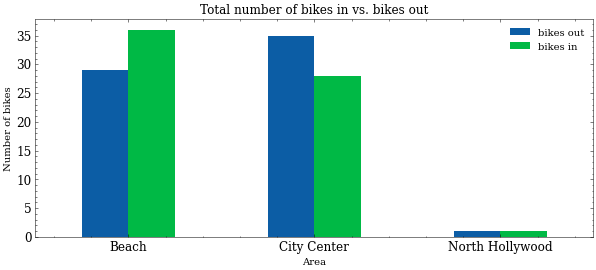

In [69]:
df_coverage.plot.bar(x='Area',
                        rot=0,
                        figsize=(10,4),
                        title='Total number of bikes in vs. bikes out',
                        xlabel='Area',
                        ylabel='Number of bikes',
                        fontsize='large')
plt.savefig("Total number in vs. out.png")



## Hourly number of bikes coming in and accordingly leaving an area

In [30]:
# seperate dataframe into three (one for each area)
df_beach = newdf[(newdf['Start Area'] == "Beach") | (newdf['End Area'] == "Beach")]
df_hollywood = newdf[(newdf['Start Area'] == "North Hollywood") | (newdf['End Area'] == "North Hollywood")]
df_city = newdf[(newdf['Start Area'] == "City Center") | (newdf['End Area'] == "City Center")]

In [31]:
# creating basis dataframe per hour
begin_date = '2019-01-01'
df_basis = pd.DataFrame({'date': pd.date_range(begin_date, periods = 365)})
df_basis = pd.concat([df_basis]*24, ignore_index = True)
df_basis.sort_values(by = 'date', ignore_index = True, inplace = True)

num_cycle = itertools.cycle([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
df_basis['hour'] = [next(num_cycle) for num in range(len(df_basis))]

### Beach

In [32]:
# prepare datasets for bikes in vs. bikes out of the area
beach_out = df_beach[(df_beach['Start Area'] == "Beach")]
beach_out["date"] = pd.to_datetime(beach_out["date"])

beach_in = df_beach[(df_beach['End Area'] == "Beach")]
beach_in["date"] = pd.to_datetime(beach_in["date"])

# merging the dataframes to get Number of rides for every hour of the year
beach_cov = df_basis.merge(beach_out[['date','hour', 'Number of rides']], how='left', on=['date', 'hour'])
beach_cov = beach_cov.rename(columns={'Number of rides':'bikes out'})

beach_cov1 = beach_cov.merge(beach_in[['date','hour', 'Number of rides']], how='left', on=['date', 'hour'])
beach_cov1 = beach_cov1.rename(columns={'Number of rides':'bikes in'})

# replace NaN by zeros
beach_coverage = beach_cov1.fillna(0)

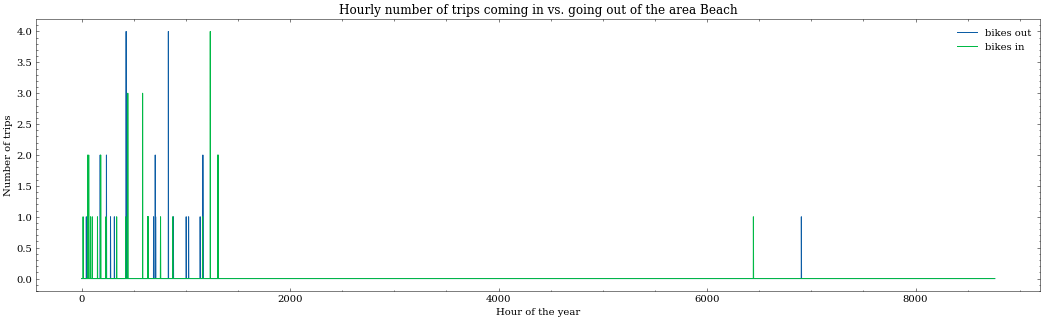

<Figure size 252x189 with 0 Axes>

In [70]:
# plot hourly number of trips in vs. out of the area
plt.figure(figsize = (18,5))
plt.plot(beach_coverage.index, beach_coverage["bikes out"], label='bikes out')
plt.plot(beach_coverage.index, beach_coverage["bikes in"], label='bikes in')
plt.title('Hourly number of trips coming in vs. going out of the area Beach')
plt.ylabel('Number of trips')
plt.xlabel('Hour of the year')
plt.legend()
plt.show()

plt.savefig("Beach in vs. out.png")

### City Center

In [34]:
# prepare datasets for bikes in vs. bikes out of the area
city_out = df_city[(df_city['Start Area'] == "City Center")]
city_out["date"] = pd.to_datetime(city_out["date"])

city_in = df_city[(df_city['End Area'] == "City Center")]
city_in["date"] = pd.to_datetime(city_in["date"])

# merging the dataframes to get Number of rides for every hour of the year
city_cov = df_basis.merge(city_out[['date','hour', 'Number of rides']], how='left', on=['date', 'hour'])
city_cov = city_cov.rename(columns={'Number of rides':'bikes out'})

city_cov1 = city_cov.merge(city_in[['date','hour', 'Number of rides']], how='left', on=['date', 'hour'])
city_cov1 = city_cov1.rename(columns={'Number of rides':'bikes in'})

# replace NaN by zeros
city_coverage = city_cov1.fillna(0)

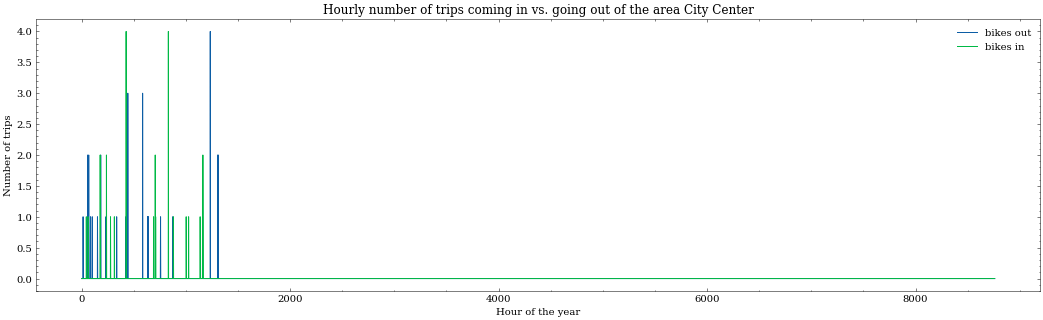

<Figure size 252x189 with 0 Axes>

In [71]:
# plot hourly number of trips in vs. out of the area
plt.figure(figsize = (18,5))
plt.plot(city_coverage.index, city_coverage["bikes out"], label='bikes out')
plt.plot(city_coverage.index, city_coverage["bikes in"], label='bikes in')
plt.title('Hourly number of trips coming in vs. going out of the area City Center')
plt.ylabel('Number of trips')
plt.xlabel('Hour of the year')
plt.legend()
plt.show()

plt.savefig("City Center in vs. out.png")

### North Hollywood

In [36]:
# prepare datasets for bikes in vs. bikes out of the area
hollywood_out = df_hollywood[(df_hollywood['Start Area'] == "North Hollywood")]
hollywood_out["date"] = pd.to_datetime(hollywood_out["date"])

hollywood_in = df_hollywood[(df_hollywood['End Area'] == "North Hollywood")]
hollywood_in["date"] = pd.to_datetime(hollywood_in["date"])

# merging the dataframes to get Number of rides for every hour of the year
hollywood_cov = df_basis.merge(hollywood_out[['date','hour', 'Number of rides']], how='left', on=['date', 'hour'])
hollywood_cov = hollywood_cov.rename(columns={'Number of rides':'bikes out'})

hollywood_cov1 = hollywood_cov.merge(hollywood_in[['date','hour', 'Number of rides']], how='left', on=['date', 'hour'])
hollywood_cov1 = hollywood_cov1.rename(columns={'Number of rides':'bikes in'})

# replace NaN by zeros
hollywood_coverage = hollywood_cov1.fillna(0)

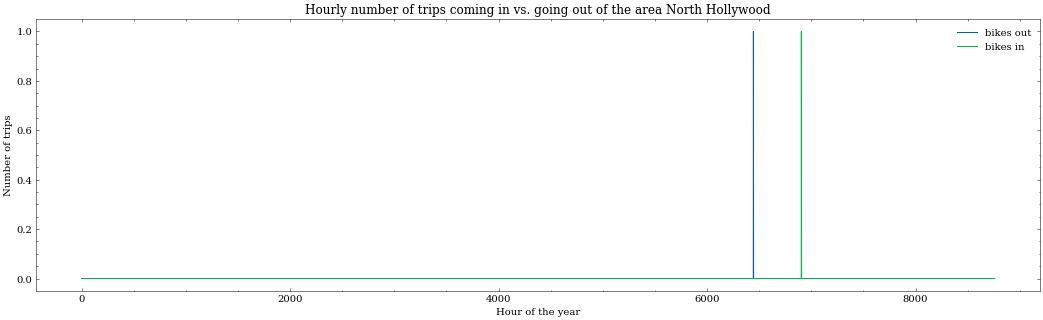

<Figure size 252x189 with 0 Axes>

In [72]:
# plot hourly number of trips in vs. out of the area
plt.figure(figsize = (18,5))
plt.plot(hollywood_coverage.index, hollywood_coverage["bikes out"], label='bikes out')
plt.plot(hollywood_coverage.index, hollywood_coverage["bikes in"], label='bikes in')
plt.title('Hourly number of trips coming in vs. going out of the area North Hollywood')
plt.ylabel('Number of trips')
plt.xlabel('Hour of the year')
plt.legend()
plt.show()

plt.savefig("North Hollywood in vs. out.png")